In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')

In [8]:
# Query to retrieve historical data for match outcomes and goal statistics
query = '''
SELECT
    strftime('%Y', Date) AS Year,
    COUNT(*) AS TotalMatches,
    AVG(CASE WHEN FTR = 'H' THEN 1 ELSE 0 END) AS HomeWinPercentage,
    AVG(CASE WHEN FTR = 'A' THEN 1 ELSE 0 END) AS AwayWinPercentage,
    AVG(CASE WHEN FTR = 'D' THEN 1 ELSE 0 END) AS DrawPercentage,
    AVG(FTHG) AS AverageHomeGoals,
    AVG(FTAG) AS AverageAwayGoals
FROM
    matchs
GROUP BY
    Year
ORDER BY
    Year
'''

# Fetch the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

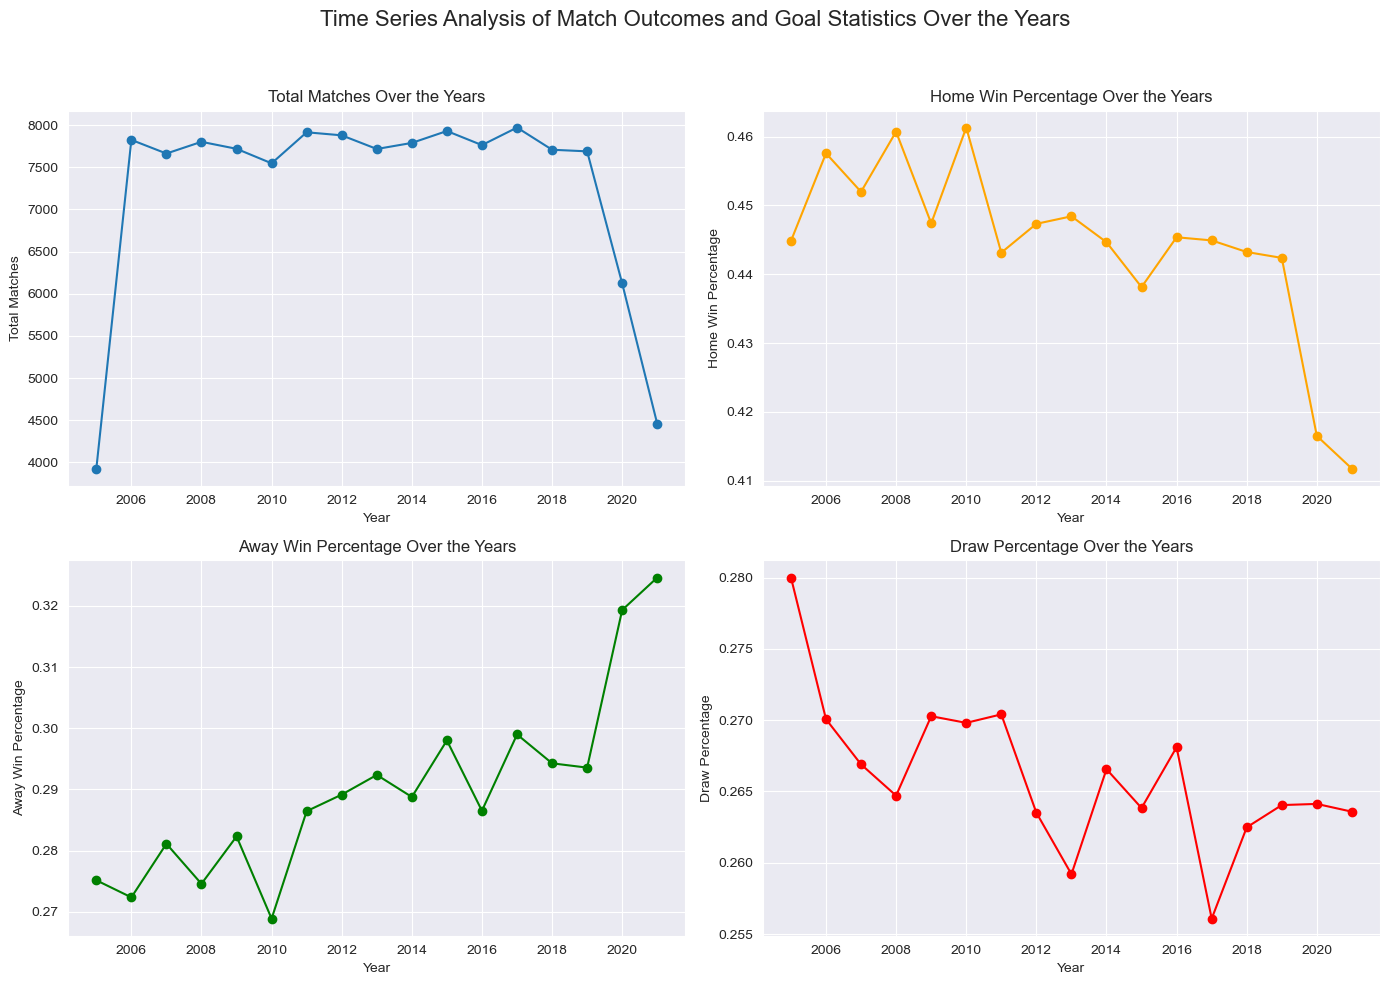

In [6]:
# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create subplots for different metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Time Series Analysis of Match Outcomes and Goal Statistics Over the Years', fontsize=16)

# Plot Total Matches Over the Years
axes[0, 0].plot(df['Year'], df['TotalMatches'], marker='o', linestyle='-')
axes[0, 0].set_title('Total Matches Over the Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Matches')

# Plot Home Win Percentage Over the Years
axes[0, 1].plot(df['Year'], df['HomeWinPercentage'], marker='o', linestyle='-', color='orange')
axes[0, 1].set_title('Home Win Percentage Over the Years')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Home Win Percentage')

# Plot Away Win Percentage Over the Years
axes[1, 0].plot(df['Year'], df['AwayWinPercentage'], marker='o', linestyle='-', color='green')
axes[1, 0].set_title('Away Win Percentage Over the Years')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Away Win Percentage')

# Plot Draw Percentage Over the Years
axes[1, 1].plot(df['Year'], df['DrawPercentage'], marker='o', linestyle='-', color='red')
axes[1, 1].set_title('Draw Percentage Over the Years')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Draw Percentage')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [13]:
# Close the database connection
conn.close()